# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>

# Question 1: Bias-Variance
a) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

a)
The given equation represents bias of the model as it has the Expected value of the prediction distribution and true values of the distribution. The definition of bias is it defined how the average model is performing. As it considers expected value of the predicted distribution, it is **Bias** of the estimator. In the above equation $E[g(x_0)]$ represents Expected value or mean of the predictions that we obtained from the model and $f(x_0)$ represents the true value distribution.

b)
Bias denotes how average model is performing as compared to the true distribution while variance denotes how the prediction distribution is according to its mean. The overall error term is defined as:

$Error = Bias^2 + Variance + IrreducibleError$<br>
We can not improve our irreducible error as can not determined by the function. If we have almost zero bias, then our model is even learning the Irreducible_Error which is random in nature and will give a high variance on test dataset as test dataset will have a random noise distribution different from train dataset. Similarly if we try to generalize a model and make it independent of training dataset then it will have very low variance but the bias will be high because the model has not learnt anything. These two cases represent the extreme cases of bias variance tradeoff. Whenever we increase model complexity or add more features on the dataset, we decrease bias and increase the learning capacity of our model. But this increases our variance and we handle it using Regularization of adding more training data. There will always be a tradeoff between two and the best methodology is to first overfit the model (low bias) and then add regularization (low variance) to attain a model with a very good predictive power and also able to generalize well. 
![](https://drive.google.com/uc?export=view&id=1k_sRh10pMMQChPSlJLGVmEGJsxzrp2fW)

# Question 2: Bias-Variance exploration 
We want to build a model that can predict y for unknown inputs x.

(a)  Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b)  Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c)  Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.

In [2]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [3]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

  # YOUR CODE COMES HERE
    #2 degree polynomial
    x_train_2 = np.vander(np.squeeze(x_train),3)
    x_test_2 = np.vander(np.squeeze(x_test),3)
    x_all_2 = np.vander(np.squeeze(x_all),3)
    lrp_fit2 = lrp.fit(x_train_2,y_train)
    y_predict_2 = lrp_fit2.predict(x_test_2)
    
    mse_2_train = mean_squared_error(y_train,lrp_fit2.predict(x_train_2))
    mse_2_test = mean_squared_error(y_test,y_predict_2)
    x_all_2_predict = lrp_fit2.predict(x_all_2)

    print('MSE on  2-degree polynomial Train Dataset:',mse_2_train)
    print('MSE on 2-degree polynomial Test Dataset:',mse_2_test)
    
    x_train_3 = np.vander(np.squeeze(x_train),5)
    x_test_3 = np.vander(np.squeeze(x_test),5)
    x_all_3 = np.vander(np.squeeze(x_all),5)
    lrp_fit3 = lrp.fit(x_train_3,y_train)
    y_predict_3 = lrp_fit3.predict(x_test_3)
    mse_3_train = mean_squared_error(y_train,lrp_fit3.predict(x_train_3))
    mse_3_test = mean_squared_error(y_test,y_predict_3)
    x_all_3_predict = lrp_fit3.predict(x_all_3)

    print('MSE on  4-degree polynomial Train Dataset:',mse_3_train)
    print('MSE on 4-degree polynomial Test Dataset:',mse_3_test)

    
    x_train_4 = np.vander(np.squeeze(x_train),8)
    x_test_4 = np.vander(np.squeeze(x_test),8)
    x_all_4 = np.vander(np.squeeze(x_all),8)
    lrp_fit4 = lrp.fit(x_train_4,y_train)
    y_predict_4 = lrp_fit4.predict(x_test_4)
    mse_4_train = mean_squared_error(y_train,lrp_fit4.predict(x_train_4))
    mse_4_test = mean_squared_error(y_test,y_predict_4)
    x_all_4_predict = lrp_fit4.predict(x_all_4)

    print('MSE on  7-degree polynomial Train Dataset:',mse_4_train)
    print('MSE on 7-degree polynomial Test Dataset:',mse_4_test)
    
    
    # Predictions on X_all
    plt.figure(figsize=(18,8))
    plt.plot(x_all,x_all_2_predict,label='x_all 2-degree Polynomial')
    plt.plot(x_all,x_all_3_predict,label='x_all 4-degree Polynomial')
    plt.plot(x_all,x_all_4_predict,label='x_all 7-degree Polynomial')
    plt.scatter(x_train,y_train,label='xtrain vs ytrain')
    plt.scatter(x_test,y_test,label='xtest vs ytest')
    plt.scatter(x_test,y_predict_2,label='xtest 2 degree polynomial')
    plt.scatter(x_test,y_predict_3,label='xtest 4 degree polynomial')
    plt.scatter(x_test,y_predict_4,label='xtest 7 degree polynomial')
    plt.ylim(-35,35)
    plt.xlim(-5,5)
    plt.legend(loc='best')


    return [mse_2_train, mse_3_train, mse_4_train], [mse_2_test, mse_3_test, mse_4_test]

MSE on  2-degree polynomial Train Dataset: 247.2967979737153
MSE on 2-degree polynomial Test Dataset: 320.0640834697786
MSE on  4-degree polynomial Train Dataset: 31.720018057290062
MSE on 4-degree polynomial Test Dataset: 31.292082886606693
MSE on  7-degree polynomial Train Dataset: 30.677193592109724
MSE on 7-degree polynomial Test Dataset: 33.41069407769016


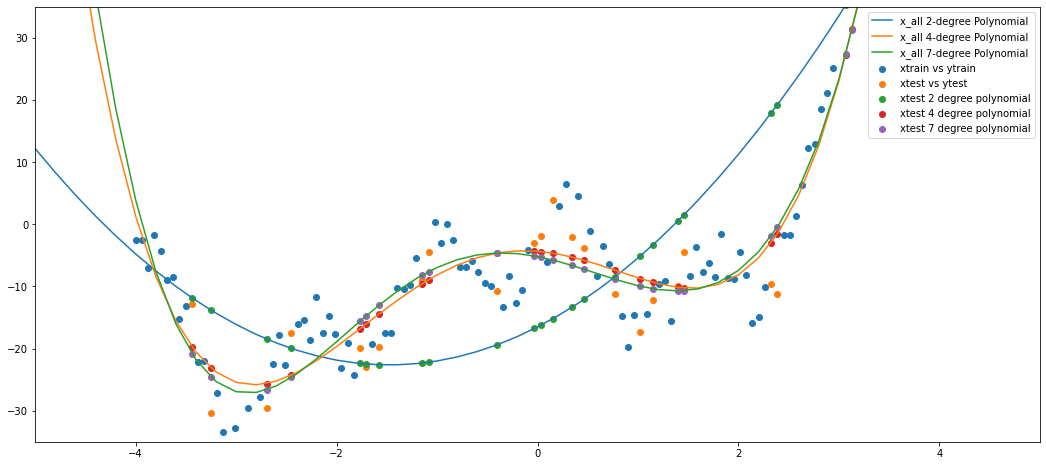

In [4]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

## Part B Answer

As per the MSE on train set and test set obtained for different models, we can see that the best model is a Linear Regression fitted on 4-degree polynomial. The Train MSE is 31.72 which is significant drop from 247 obtained from a 20degree polynomial. That means we have been able to successfully reduce the bias by increasing the complexity of the model.

Variance is checked by measuring the MSE values on prior unseen data - test data. From the above results, the least MSE on test data is obtained on 4-degree polynomial. So we have been able to reduce the vairance as compared to the 2-degree polynomial.

We didn't select 7-degree polynomial becasue it has higher test MSE and the reduction in train MSE as compared to 7-degree polynomial. So considering the bias-variance tradeoff, we would finalize 4-degree polynomial as the best one.

In [5]:
def plot_curves_data_size(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

  # YOUR CODE COMES HERE
    #2 degree polynomial
    x_train_2 = np.vander(np.squeeze(x_train),3)
    x_test_2 = np.vander(np.squeeze(x_test),3)
    x_all_2 = np.vander(np.squeeze(x_all),3)
    lrp_fit2 = lrp.fit(x_train_2,y_train)
    y_predict_2 = lrp_fit2.predict(x_test_2)
    
    mse_2_train = mean_squared_error(y_train,lrp_fit2.predict(x_train_2))
    mse_2_test = mean_squared_error(y_test,y_predict_2)
    x_all_2_predict = lrp_fit2.predict(x_all_2)

    print('MSE on  2-degree polynomial Train Dataset:',mse_2_train)
    print('MSE on 2-degree polynomial Test Dataset:',mse_2_test)
    
    x_train_3 = np.vander(np.squeeze(x_train),5)
    x_test_3 = np.vander(np.squeeze(x_test),5)
    x_all_3 = np.vander(np.squeeze(x_all),5)
    lrp_fit3 = lrp.fit(x_train_3,y_train)
    y_predict_3 = lrp_fit3.predict(x_test_3)
    mse_3_train = mean_squared_error(y_train,lrp_fit3.predict(x_train_3))
    mse_3_test = mean_squared_error(y_test,y_predict_3)
    x_all_3_predict = lrp_fit3.predict(x_all_3)

    print('MSE on  4-degree polynomial Train Dataset:',mse_3_train)
    print('MSE on 4-degree polynomial Test Dataset:',mse_3_test)

    
    x_train_4 = np.vander(np.squeeze(x_train),8)
    x_test_4 = np.vander(np.squeeze(x_test),8)
    x_all_4 = np.vander(np.squeeze(x_all),8)
    lrp_fit4 = lrp.fit(x_train_4,y_train)
    y_predict_4 = lrp_fit4.predict(x_test_4)
    mse_4_train = mean_squared_error(y_train,lrp_fit4.predict(x_train_4))
    mse_4_test = mean_squared_error(y_test,y_predict_4)
    x_all_4_predict = lrp_fit4.predict(x_all_4)

    print('MSE on  7-degree polynomial Train Dataset:',mse_4_train)
    print('MSE on 7-degree polynomial Test Dataset:',mse_4_test)
    

    return [mse_2_train, mse_3_train, mse_4_train], [mse_2_test, mse_3_test, mse_4_test]

In [6]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves_data_size(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves_data_size(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves_data_size(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves_data_size(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves_data_size(x_train, y_train, x_test, y_test)

20% data
MSE on  2-degree polynomial Train Dataset: 161.17147378830043
MSE on 2-degree polynomial Test Dataset: 402.3231269099287
MSE on  4-degree polynomial Train Dataset: 35.11511313912978
MSE on 4-degree polynomial Test Dataset: 38.340744983442825
MSE on  7-degree polynomial Train Dataset: 22.543946691373257
MSE on 7-degree polynomial Test Dataset: 135.20764526756494
40% data
MSE on  2-degree polynomial Train Dataset: 150.33251286085704
MSE on 2-degree polynomial Test Dataset: 405.8051669616576
MSE on  4-degree polynomial Train Dataset: 31.6245296464469
MSE on 4-degree polynomial Test Dataset: 33.16428295918743
MSE on  7-degree polynomial Train Dataset: 25.492718751653644
MSE on 7-degree polynomial Test Dataset: 61.23741884551061
60% data
MSE on  2-degree polynomial Train Dataset: 150.08383759141728
MSE on 2-degree polynomial Test Dataset: 403.2513784833407
MSE on  4-degree polynomial Train Dataset: 29.1928057399479
MSE on 4-degree polynomial Test Dataset: 31.781415416196726
MSE on 

Text(0.5, 1.0, 'Log(MSE) VS. Data Size %')

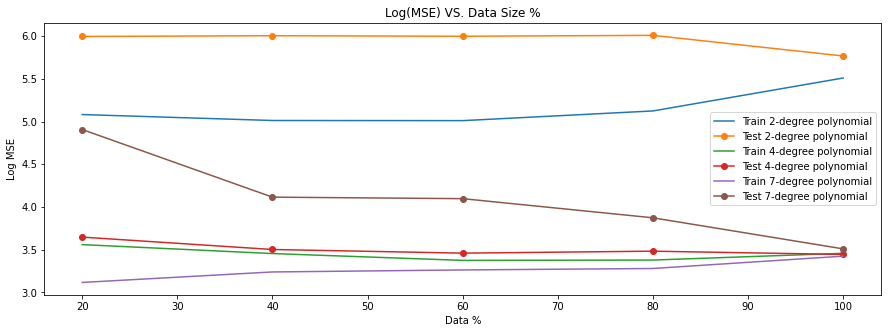

In [13]:
#for 2 degree polynomial
train_rmses_20_log = np.log(train_rmses_20)
train_rmses_40_log = np.log(train_rmses_40)
train_rmses_60_log = np.log(train_rmses_60)
train_rmses_80_log = np.log(train_rmses_80)
train_rmses_100_log = np.log(train_rmses_100)

test_rmses_20_log = np.log(test_rmses_20)
test_rmses_40_log = np.log(test_rmses_40)
test_rmses_60_log = np.log(test_rmses_60)
test_rmses_80_log = np.log(test_rmses_80)
test_rmses_100_log = np.log(test_rmses_100)


plt.figure(figsize=(15,5))
plt.plot([20,40,60,80,100],[train_rmses_20_log[0],train_rmses_40_log[0],train_rmses_60_log[0],\
                            train_rmses_80_log[0],train_rmses_100_log[0]],label='Train 2-degree polynomial')
plt.plot([20,40,60,80,100],[test_rmses_20_log[0],test_rmses_40_log[0],test_rmses_60_log[0],\
                            test_rmses_80_log[0],test_rmses_100_log[0]],label='Test 2-degree polynomial',marker='o')




plt.plot([20,40,60,80,100],[train_rmses_20_log[1],train_rmses_40_log[1],train_rmses_60_log[1],\
                            train_rmses_80_log[1],train_rmses_100_log[1]],label='Train 4-degree polynomial')
plt.plot([20,40,60,80,100],[test_rmses_20_log[1],test_rmses_40_log[1],test_rmses_60_log[1],\
                            test_rmses_80_log[1],test_rmses_100_log[1]],label='Test 4-degree polynomial',marker='o')



plt.plot([20,40,60,80,100],[train_rmses_20_log[2],train_rmses_40_log[2],train_rmses_60_log[2],\
                            train_rmses_80_log[2],train_rmses_100_log[2]],label='Train 7-degree polynomial')
plt.plot([20,40,60,80,100],[test_rmses_20_log[2],test_rmses_40_log[2],test_rmses_60_log[2],\
                            test_rmses_80_log[2],test_rmses_100_log[2]],label='Test 7-degree polynomial',marker='o')


plt.legend(loc='best')
plt.ylabel('Log MSE')
plt.xlabel('Data %')
plt.title('Log(MSE) VS. Data Size %')


We can see that adding more data has no effect on Bias because Training MSE is not changing much. But adding more data decreases the variance as we can see that Test MSE is decreasing with more number of rows.

For 2-degree error, there is a higher proprotion of bias component and for 7-degree polynomial there is a higher proportion of variance in error. From the above graph, we see the 2-degree polynomial test error remains almost constant whereas the 7-degree test error decrease with increase in sample size. Essentially this is indicative of increasing sample size reduces variance component but doesn't have any effect on bias component of the error.

# Question 3: Gradient descent

a)  Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b)  Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

a)
Gradient Descent is the true gradient descent because it uses the complete data to compare the gradients. It is also called as batch Gradient Descent. Stochastic Gradient Descent is the special case of Gradient Descent which is applied on each row individually and weights are updated after each row. SGD is good for very large datasets as it is computationally less intensive. SGD is also helpful in reaching towards the global minima as it has the capability to movepast the local minima. Gradient Descent is better than SGD as it is not as noisy. It takes lower oscillations and less noisy steps towards the minima of the loss function because it takes the average of all the training sample rather than a single sample. As Gradient Descent works on whole dataset, it can get computationally intensive for very large datasets.

b)
In a second order optimization, we approach the minima of a function and also control the step size of out movement. In Nelder-Mead method, we go towards the minima of a function by choosing two points and moving towards the direction of lowest point. Its a second order optimization as it involves changing the step size of the descent based on the lowest values of given points. If the new point has a vlue lower than the lowest point, then the step size expands by a factor of 2(usually). if it is not better, it usually contracts by half. This way the algorithm reaches the local minima. This method works well for 2 or 3-D data but is not able to perform when there are multiple dimensions.

# Question 4: Stochastic gradient descent 

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:


As it is a Stochastic Gradient Descent, we will only calculate the error for one sample and derive gradients wrt that. <br>
1. Gradient = Error * Basis_Function <br>
2. Weight = Weight - Learning_Rate * Gradient


error = $(y-(w_0 + w_1x_1 + w_2x_1x_2 + w_3*e^{-x_1}))$


$\delta error/\delta w_0 = -1$<br>
$gradient[0] = error*(\delta error/\delta w_0)$<br>
$w_0 = w_0 + lr*gradient[0]$



$\delta error/\delta w_1 = -x_1$<br>
$gradient[1] = error*(\delta error/\delta w_1)$<br>
$w_1 = w_1 + lr*gradient[1]$

$\delta error/\delta w_2 = -x_1x_2$<br>
$gradient[2] = error*(\delta error/\delta w_2)$<br>
$w_2 = w_2 + lr*gradient[2]$

$\delta error/\delta w_3 = -e^{-x_1}$<br>
$gradient[3] = error*(\delta error/\delta w_3)$<br>
$w_3 = w_3 + lr*gradient[3]$

# Question 5: Stochastic gradient descent coding 

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a)  Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b)  Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [8]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        self.coef  = self.coef + self.learning_rate*gradient
        return self.coef

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                
                # Compute error
                predictions = self.linearPredict(X[i])
                error = (y[i]-predictions) - self.regularization*np.sum(self.coef[1:]**2,axis=0)
               
                # Compute gradients
                gradient = np.zeros(4)
                gradient[0] = error*X[i,0]
                gradient[1:] = error*X[i,1:] + 2*self.regularization
                               
                # Update weights
                self.coef = self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        
        self.lowest_mse = mse[-1]
    
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.title('Regularization: %d, Learning Rate: %2.4f' % (self.regularization,self.learning_rate))
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.title('Regularization: %d, Learning Rate: %2.4f' % (self.regularization,self.learning_rate))
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            
        return mse


    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        return np.dot(X,self.coef)

In [9]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [10]:
model_mse = {}
for lr in learning_rate:
    for reg in regularization:
        sgd = Regression(lr,reg,n_epochs)
        sgd.fit(X,y)
        if sgd.lowest_mse>0:
            model_mse[sgd.lowest_mse] = (lr,reg)

<ipython-input-8-611a7a87b7bb>:29: RuntimeWarning: overflow encountered in square
  error = (y[i]-predictions) - self.regularization*np.sum(self.coef[1:]**2,axis=0)
<ipython-input-8-611a7a87b7bb>:29: RuntimeWarning: invalid value encountered in double_scalars
  error = (y[i]-predictions) - self.regularization*np.sum(self.coef[1:]**2,axis=0)
C:\Users\prakh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [11]:
top_2_mse = list(sorted(model_mse.keys())[:2])
[model_mse[key] for key in top_2_mse]

[(0.01, 0), (0.001, 0)]

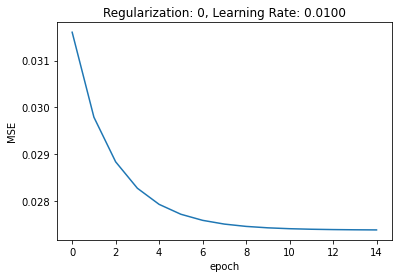

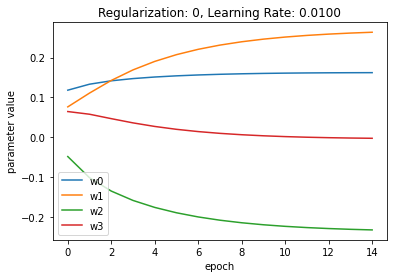

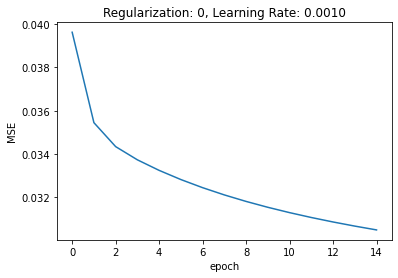

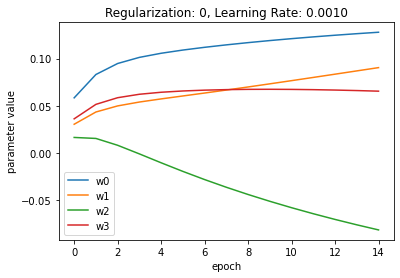

In [12]:
model_mse = {}
for lr in [.01,.001]:
    for reg in [0]:
        sgd = Regression(lr,reg,n_epochs)
        sgd.fit(X,y,plot=True)

## Part B Answer

Learning Rate and Regularization for top 2 MSE:
1. MSE = .02739 | LR = .01 | Regularization = 0
1. MSE = .03049 | LR = .001 | Regularization = 0